In [22]:
import numpy as np
import os
import pandas as pd
from google.cloud import storage


In [23]:
base_dir = "../../raw_data/"


In [39]:
dfs = []
for i in range(1, 7):
    murs_path = os.path.join(base_dir, f"maquette{i}", f"murs{i}.csv")
    if os.path.exists(murs_path):
        # Cherche la ligne d'en-tête réelle
        with open(murs_path, encoding="utf-8") as f:
            for idx, line in enumerate(f):
                if line.startswith("Id;"):
                    header_row = idx
                    break
        try:
            df = pd.read_csv(murs_path, sep=';', decimal=",", header=header_row)
            dfs.append(df)
            print(f"Chargé : {murs_path} ({df.shape[0]} lignes, {df.shape[1]} colonnes)")
            print(df.head())
        except Exception as e:
            print(f"Erreur de parsing : {murs_path} -> {e}")
    else:
        print(f"Fichier non trouvé : {murs_path}")

if dfs:
    murs_concat = pd.concat(dfs, ignore_index=True)
    print(f"Total concaténé : {murs_concat.shape[0]} lignes, {murs_concat.shape[1]} colonnes")
else:
    murs_concat = pd.DataFrame()
    print("Aucun fichier murs.csv trouvé.")

murs_concat.head()

Chargé : ../../raw_data/maquette1/murs1.csv (1589 lignes, 146 colonnes)
       Id 011EC_Lot 012EC_Ouvrage 013EC_Localisation 014EC_Mode Constructif  \
0  779920        GO           MUR          INTERIEUR           POUTRE VOILE   
1  780111        GO           MUR          INTERIEUR           POUTRE VOILE   
2  780661        GO           MUR          INTERIEUR                 BANCHE   
3  783007        GO           MUR          INTERIEUR                 BANCHE   
4  783554        GO           MUR          INTERIEUR           POUTRE VOILE   

           Nom  Hauteur  Epaisseur            AI    AS  ...  \
0  Voile BA 20     2.88        0.2 -1.378800e-12  2.88  ...   
1  Voile BA 20     2.88        0.2 -1.378800e-12  2.88  ...   
2  Voile BA 20     2.88        0.2 -1.378800e-12  2.88  ...   
3  Voile BA 20     2.88        0.2 -1.378800e-12  2.88  ...   
4  Voile BA 20     2.88        0.2 -1.378800e-12  2.88  ...   

   Code d'assemblage  Retournement aux insertions  \
0                NaN 

,Id,011EC_Lot,012EC_Ouvrage,013EC_Localisation,014EC_Mode Constructif,Nom,Hauteur,Epaisseur,AI,AS,...,EIF_STR - Impact,EC_Type de Mur,ID MONTAGE,Désignation système,Réf DT,Nature_Ouvrage,Batiment,Mur armé,Affichage poteau,NIVEAU_STRUCTURE
0,779920,GO,MUR,INTERIEUR,POUTRE VOILE,Voile BA 20,2.88,0.2,-1.378800e-12,2.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,780111,GO,MUR,INTERIEUR,POUTRE VOILE,Voile BA 20,2.88,0.2,-1.378800e-12,2.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,780661,GO,MUR,INTERIEUR,BANCHE,Voile BA 20,2.88,0.2,-1.378800e-12,2.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,783007,GO,MUR,INTERIEUR,BANCHE,Voile BA 20,2.88,0.2,-1.378800e-12,2.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,783554,GO,MUR,INTERIEUR,POUTRE VOILE,Voile BA 20,2.88,0.2,-1.378800e-12,2.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:

if dfs:
    murs_concat = pd.concat(dfs, ignore_index=True)
    print(f"Total concaténé : {murs_concat.shape[0]} lignes, {murs_concat.shape[1]} colonnes")
else:
    murs_concat = pd.DataFrame()
    print("Aucun fichier murs.csv trouvé.")


Total concaténé : 2867 lignes, 160 colonnes


In [41]:
#murs_concat['013EC_Localisation'].unique()
murs_concat.columns

Index(['Id', '011EC_Lot', '012EC_Ouvrage', '013EC_Localisation',
       '014EC_Mode Constructif', 'Nom', 'Hauteur', 'Epaisseur', 'AI', 'AS',
       ...
       'EIF_STR - Impact', 'EC_Type de Mur', 'ID MONTAGE',
       'Désignation système', 'Réf DT', 'Nature_Ouvrage', 'Batiment',
       'Mur armé', 'Affichage poteau', 'NIVEAU_STRUCTURE'],
      dtype='object', length=160)

In [27]:
colonnes_a_garder = [
    "Epaisseur",
    "Sols en intersection",
    "Sols coupés (u)",
    "Sols coupants (u)",
    "Sol au-dessus",
    "Sol en-dessous",
    "Fenêtres",
    "Portes",
    "Ouvertures",
    "Murs imbriqués",
    "Mur multicouche",
    "Profil modifié",
    "Extension inférieure",
    "Extension supérieure",
    "Partie inférieure attachée",
    "Partie supérieure attachée",
    "Décalage supérieur",
    "Décalage inférieur",
    "Matériau structurel"
]

# On ne garde que les colonnes présentes dans le DataFrame
murs_concat = murs_concat[[col for col in colonnes_a_garder if col in murs_concat.columns]]

In [42]:
murs_concat["Matériau structurel"].unique()

array(['ECSA - Béton Voiles', 'ECSA - Béton Non porteur', 'EC - Béton',
       '<Par catégorie>', 'Maçonnerie - Voile BA',
       'Blocs béton manufacturés', 'C25/30', 'Maçonnerie'], dtype=object)

In [43]:
all_features = murs_concat.keys().to_list()
to_keep = ['Hauteur','Epaisseur','Sol au-dessus','Sol en-dessous','Fenêtres','Portes','Ouvertures']
to_exp =  ['Volume', 'Surface','Hauteur', 'Longueur','Largeur']
family =  ['Famille et type', 'Famille']
y = ["Matériau structurel"]

In [73]:
y = murs_concat["Matériau structurel"]
X = murs_concat[to_exp]

In [95]:
#y to lables
y_dict = {'ECSA - Béton Voiles':0,
          'ECSA - Béton Non porteur':7,
          'EC - Béton':2,
       '<Par catégorie>':3,
       'Maçonnerie - Voile BA':4,
       'Blocs béton manufacturés':5,
       'C25/30':6,
       'Maçonnerie':1}

y_labeled = y.apply(lambda x: y_dict[x])
y_labeled


0       0
1       0
2       0
3       0
4       0
       ..
2862    4
2863    4
2864    4
2865    4
2866    4
Name: Matériau structurel, Length: 2867, dtype: int64

<Axes: xlabel='Matériau structurel', ylabel='Count'>

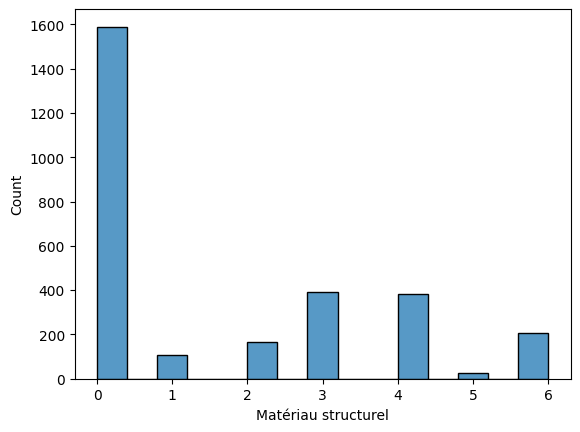

In [98]:
import seaborn as sns

sns.histplot(y_labeled)

In [97]:
y_labeled[y_labeled == 7] = 0

In [99]:
#minmax scaler test:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_scaled = minmax_scaler.fit_transform(X)


In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_labeled, test_size = 0.4, random_state = 13
)


In [101]:
from xgboost import XGBClassifier

xgb_class = XGBClassifier(max_depth=10, n_estimators=100, learning_rate=0.1)

xgb_class.fit(X_train, y_train,
    #eval_set=[(X_train, y_train), (X_val, y_val)],
)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [102]:
y_train.unique()

array([2, 0, 3, 4, 5, 1, 6])

In [103]:
y_test.unique()

array([0, 4, 3, 1, 6, 2, 5])

In [104]:
#cross validation
from sklearn.model_selection import cross_validate

# 5-Fold Cross validate model
cv_results = cross_validate(xgb_class, X_test, y_test, cv=5)

# Scores
print(cv_results['test_score'])

# Mean of scores
cv_results['test_score'].mean()

[0.90434783 0.93913043 0.95633188 0.93449782 0.93449782]


np.float64(0.9337611543573191)

In [59]:
y_pred = xgb_class.predict(X_test)

In [60]:
y_pred

array([0, 0, 0, 0, 0, 0, 4, 3, 6, 0, 0, 4, 0, 0, 4, 0, 0, 7, 0, 2, 0, 0,
       0, 6, 6, 4, 3, 4, 0, 0, 0, 0, 0, 7, 4, 4, 4, 0, 0, 3, 4, 0, 0, 2,
       4, 3, 4, 6, 0, 0, 0, 4, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 4, 6,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 6, 4, 4, 0, 0, 0, 0, 0, 3, 3, 6,
       3, 4, 0, 0, 0, 3, 0, 0, 4, 0, 0, 6, 5, 4, 7, 0, 0, 0, 2, 0, 0, 0,
       0, 4, 3, 7, 0, 5, 3, 0, 0, 0, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 7,
       3, 0, 3, 4, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 6, 4, 0, 4, 0, 0, 0, 0,
       6, 3, 4, 4, 0, 0, 0, 0, 6, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0,
       7, 0, 4, 0, 0, 4, 4, 0, 0, 6, 0, 0, 7, 0, 0, 0, 2, 3, 7, 0, 0, 2,
       3, 0, 0, 0, 4, 0, 7, 3, 6, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 6, 0, 0,
       0, 4, 6, 4, 3, 4, 0, 0, 0, 4, 0, 0, 4, 0, 0, 6, 5, 3, 4, 5, 0, 3,
       5, 6, 4, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 3,
       0, 0, 3, 0, 6, 0, 4, 4, 0, 3, 0, 0, 4, 3, 2, 7, 6, 4, 0, 4, 0, 0,
       4, 7, 0, 3, 4, 0, 0, 2, 0, 0, 3, 4, 0, 0, 0,